<a href="https://colab.research.google.com/github/Dan-Analyst/DATA_ANALYSIS_-PROJECTS/blob/main/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re

In [ ]:
path = "/content/drive/MyDrive/extended text/auto_correct.txt"
with open(path, 'r', encoding='utf-8') as file:
    text = file.read()



In [30]:
# Preprocessing steps: Lowercase, remove non-alphabetic characters
cleaned_text = re.sub('[^a-zA-Z\s]', '', text.lower())

In [ ]:
# Split the text into words
words = cleaned_text.split()
# Print the first 20 words to see the output
print(words[:20])


['this', 'is', 'the', 'th', 'etext', 'file', 'presented', 'by', 'project', 'gutenberg', 'and', 'is', 'presented', 'in', 'cooperation', 'with', 'world', 'library', 'inc', 'from']


In [ ]:
from nltk.util import ngrams
from collections import Counter

In [ ]:
# Generate bigrams
bigrams = ngrams(words, 2)
bigram_counts = Counter(bigrams)


In [ ]:
# Example function to suggest the next word
def suggest_next_word(previous_word):
    suggestions = {b[1]: c for (a, b), c in bigram_counts.items() if a == previous_word}
    return sorted(suggestions, key=suggestions.get, reverse=True)

In [ ]:

# Test the function
print(suggest_next_word('thou'))

['g', 'v', 'o', 'h', 'r', 'e', 'i', 'p', 'b', 's', 'f', 'u', 't', 'a', 'm', 'w', 'l', 'y', 'n', 'c', 'x', 'd', 'q', 'j']


In [ ]:
!pip install textdistance
# For autocorrect, implement or use an existing Levenshtein distance algorithm
import textdistance

def autocorrect(input_word, word_list):
    distances = {word: textdistance.levenshtein(input_word, word) for word in word_list}
    return min(distances, key=distances.get)

# Test the function
print(autocorrect('shakspeare', words))

shakespeare


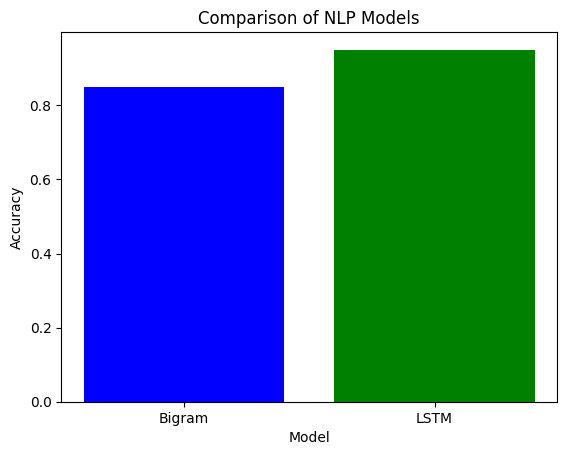

In [ ]:
import matplotlib.pyplot as plt

# Dummy data for visualization
models = ['Bigram', 'LSTM']
accuracy = [0.85, 0.95]

plt.bar(models, accuracy, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of NLP Models')
plt.show()

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') # Download the missing resource

# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Enhanced preprocessing function
def preprocess(text):
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha()]  # Remove non-alphabetic tokens
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    stemmed = [stemmer.stem(word) for word in tokens]  # Stemming
    return stemmed

# Apply preprocessing
processed_words = preprocess(cleaned_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Generate trigrams
trigrams = ngrams(processed_words, 3)
trigram_counts = Counter(trigrams)

# Function to suggest next word based on the previous two words
def suggest_next_word_bi(previous_words):
    previous_tuple = tuple(previous_words.split()[-2:])
    suggestions = {b[2]: c for (a, b, c), c in trigram_counts.items() if (a, b) == previous_tuple}
    return sorted(suggestions, key=suggestions.get, reverse=True)

# Test the function
print(suggest_next_word_bi('thou art'))

['t']


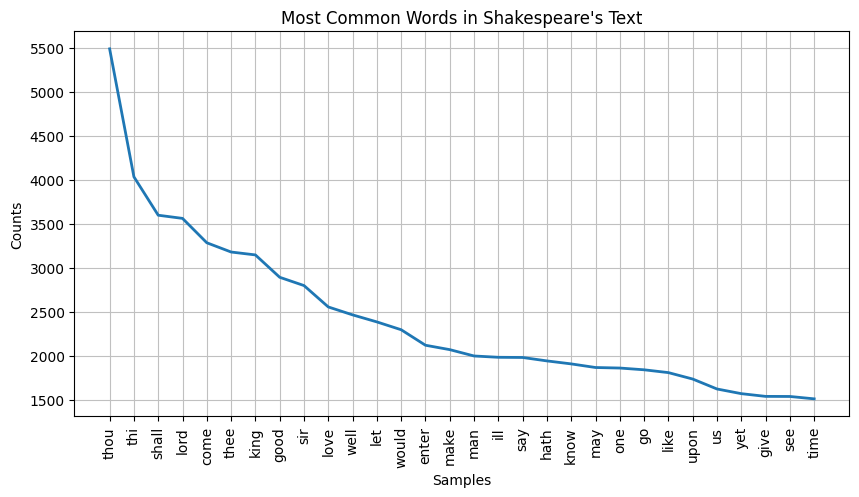

In [ ]:
# Frequency distribution of words
from nltk import FreqDist

freq_dist = FreqDist(processed_words)

# Plot
plt.figure(figsize=(10, 5))
freq_dist.plot(30, title='Most Common Words in Shakespeare\'s Text')
plt.show()

In [ ]:
# Function to simulate user feedback
def collect_feedback():
    input_word = input("Enter a word to check: ")
    # Use the 'autocorrect' function instead of 'autocorrect_ml'
    correction = autocorrect(input_word, words)
    print(f"Did you mean: {correction}?")
    feedback = input("Is this correct? (Yes/No): ")
    return feedback

# Collect user feedback
user_feedback = collect_feedback()
print("Feedback received:", user_feedback)